1. Import the Iris dataset form the link: https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv

In [5]:
import pandas as pd
link = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv"

iris_data = pd.read_csv(link)

print(iris_data.head())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


2. Create a pairplot to visualize the similarities and especially difference between the species using seaborn

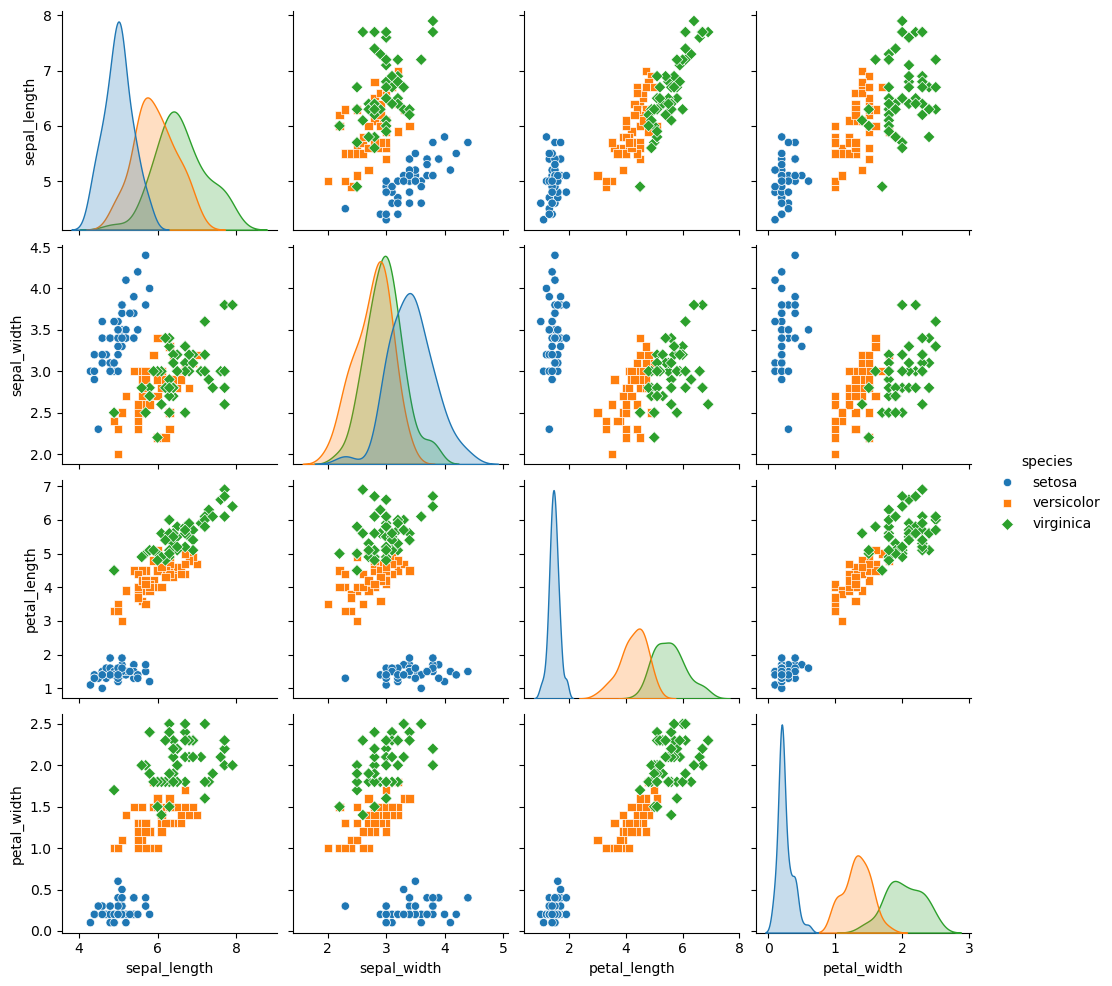

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(iris_data, hue="species", markers=["o", "s", "D"])

plt.show()

3. Provide code to Check the dataset (eg: head, info, describe)

In [23]:
print(iris_data.head(),"\n",iris_data.describe(),"\n",iris_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa 
        sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333     

4. Separate the independent variables from dependent variables (ie: X, y)

In [57]:
X=iris_data.drop(columns='species')
Y=iris_data['species']

5. Split the dataset into train and test using sklearn train_test_split package

In [59]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

print("Training set shape:", X_train.shape, Y_train.shape)
print("Testing set shape:", X_test.shape, Y_test.shape)

Training set shape: (120, 4) (120,)
Testing set shape: (30, 4) (30,)


6. Run the following code to train an SVM classifier where x_train and y_train are obtained from (5)

In [61]:
from sklearn.svm import SVC
model=SVC()

In [63]:
model.fit(X_train, Y_train)

SVC()

7. Run the following to perform prediction

In [67]:
y_pred=model.predict(X_test)
y_pred

array(['setosa', 'virginica', 'versicolor', 'versicolor', 'setosa',
       'versicolor', 'setosa', 'setosa', 'virginica', 'versicolor',
       'virginica', 'virginica', 'virginica', 'versicolor', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'virginica',
       'setosa', 'virginica', 'versicolor', 'virginica', 'virginica',
       'virginica', 'versicolor', 'setosa', 'virginica', 'setosa'],
      dtype=object)

8. Provide code to find the Accuracy, Precision, Recall, F1-score

In [119]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred, average='weighted')
recall = recall_score(y_test,y_pred,average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.9666666666666667
Precision: 0.9696969696969696
Recall: 0.9666666666666667
F1 Score: 0.9665831244778613


9. Provide code to show the report and confusion matrix


Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



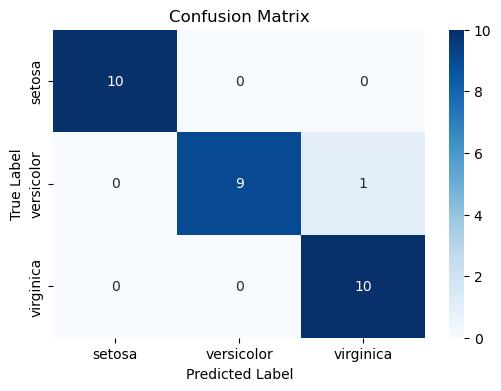

In [123]:
y_pred = model.predict(X_test)

print("\nClassification Report:\n", classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()